# House Prices: Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

Link: <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">Kaggle challenge</a>

### Libraries

In [1]:
%pylab inline
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pylab import savefig

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Helpers

In [2]:
def get_name_zone(value):
    if value == "A":
        return "Agriculture"
    elif value == "C":
        return "Commercial"
    elif value == "FV":
        return "Floating Village Residential"
    elif value == "I":
        return "Industrial"
    elif value == "RH":
        return "Residential High Density"
    elif value == "RL":
        return "Residential Low Density"
    elif value == "RP":
        return "Residential Low Density Park"
    elif value == "RM":
        return "Residential Medium Density"
 

### Global variables

In this section, the variables that will be queried during the analysis will be initialized.

In [3]:
test = "dataset/test.csv"
train = "dataset/train.csv"

### Importing datasets (train and test) to dataframe of pandas

In [4]:
ds = pandas.read_csv(train, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Getting informations about data

In [5]:
ds.shape

(1460, 81)

In [6]:
ds.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,1460,1201,1460,1460,91,1460,1460,1460,...,1460,7,281,54,1460,1460,1460,1460,1460,1460
unique,1460,15,5,110,1073,2,2,4,4,2,...,8,3,4,4,21,12,5,9,6,663
top,1063,20,RL,60,7200,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,140000
freq,1,536,1151,143,25,1454,50,925,1311,1459,...,1453,3,157,49,1408,253,338,1267,1198,20


### Checking the amount of null data in the file

In [7]:
for col in list(ds.columns.values):
        print ("Number of missing data on " + col + ":" ,ds[col].isnull().values.sum())

Number of missing data on Id: 0
Number of missing data on MSSubClass: 0
Number of missing data on MSZoning: 0
Number of missing data on LotFrontage: 259
Number of missing data on LotArea: 0
Number of missing data on Street: 0
Number of missing data on Alley: 1369
Number of missing data on LotShape: 0
Number of missing data on LandContour: 0
Number of missing data on Utilities: 0
Number of missing data on LotConfig: 0
Number of missing data on LandSlope: 0
Number of missing data on Neighborhood: 0
Number of missing data on Condition1: 0
Number of missing data on Condition2: 0
Number of missing data on BldgType: 0
Number of missing data on HouseStyle: 0
Number of missing data on OverallQual: 0
Number of missing data on OverallCond: 0
Number of missing data on YearBuilt: 0
Number of missing data on YearRemodAdd: 0
Number of missing data on RoofStyle: 0
Number of missing data on RoofMatl: 0
Number of missing data on Exterior1st: 0
Number of missing data on Exterior2nd: 0
Number of missing 

### Verifying the relation of zones with the average price

In [8]:
# Converting data type
ds['SalePrice'] = ds['SalePrice'].apply(pandas.to_numeric)
ds['MSZoningDesc'] = ds['MSZoning'].apply(get_name_zone)

In [9]:
# Showing results
ds.groupby('MSZoningDesc')['SalePrice']\
    .agg(["mean", "std"])

,mean,std
MSZoningDesc,,
Floating Village Residential,214014.061538,52369.662067
Residential High Density,131558.375000,35714.118435
Residential Low Density,191004.994787,80766.341319
Residential Medium Density,126316.830275,48521.689833


Text(0.5,0.98,'')

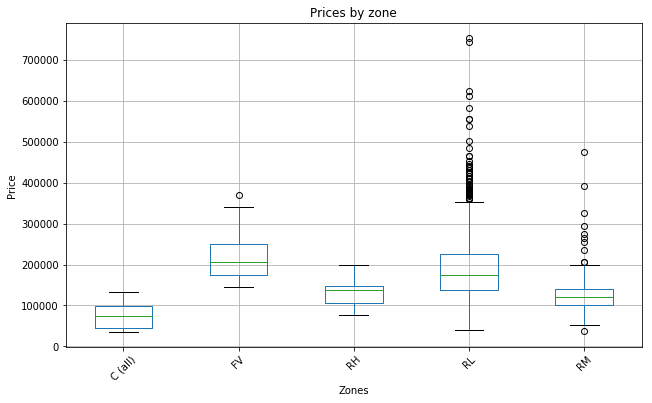

In [10]:
ax = ds[['SalePrice', 'MSZoning']].boxplot(by='MSZoning', figsize=(10, 6), rot=45)
ax.set_xlabel('Zones')
ax.set_ylabel('Price')
ax.set_title('Prices by zone');
plt.suptitle('') 

In above plot, it is possible see many outliers data to Residential Low Density and it has more variability than other groups.